In [ ]:
!pip install opencv
!pip install opencv-contrib-python==3.4.2.17

ERROR: Could not find a version that satisfies the requirement opencv (from versions: none)
ERROR: No matching distribution found for opencv
     |████████████████████████████████| 30.6 MB 26 kB/s 
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


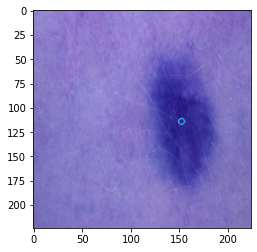

In [ ]:
import cv2 
import matplotlib.pyplot as plt
%matplotlib inline

#reading image
img1 = cv2.imread('/content/drive/MyDrive/Melanoma_Data/Raw_eff/valid/NotMelanoma/1050.jpg.jpg')  


#keypoints
sift = cv2.xfeatures2d.SIFT_create()
keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)

img_1 = cv2.drawKeypoints(img1,keypoints_1,img1)
plt.imshow(img_1)

In [ ]:
%cd /content/drive/MyDrive/SIFT/

/content/drive/MyDrive/SIFT


In [ ]:
import matplotlib
import numpy as np
import cv2
from matplotlib import pyplot as plt
from PIL import Image, ImageFilter
from skimage.io import imread, imshow
import os
import glob
import pandas as pd

from _helper_functions import hueShift,hsv_to_rgb,rgb_to_hsv,resize_aspect_fit,get_hue_sift

In [ ]:
path = '/content/drive/MyDrive/Melanoma_Data/Raw_eff/train/NotMelanoma/'

train_NotMelanoma = resize_aspect_fit(path,224)

train_NotMelanoma.shape

(1047, 224, 224, 3)

In [ ]:
path = '/content/drive/MyDrive/Melanoma_Data/Raw_eff/test/NotMelanoma/'

test_NotMelanoma = resize_aspect_fit(path,224)

test_NotMelanoma.shape

(225, 224, 224, 3)

In [ ]:
path = '/content/drive/MyDrive/Melanoma_Data/Raw_eff/train/Melanoma/'

train_Melanoma = resize_aspect_fit(path,224)

train_Melanoma.shape

(1047, 224, 224, 3)

In [ ]:
path = '/content/drive/MyDrive/Melanoma_Data/Raw_eff/test/Melanoma/'

test_Melanoma = resize_aspect_fit(path,224)

test_Melanoma.shape

(225, 224, 224, 3)

In [ ]:
train_NotMelanoma = get_hue_sift(train_NotMelanoma)
train_Melanoma = get_hue_sift(train_Melanoma)
test_NotMelanoma = get_hue_sift(test_NotMelanoma)
test_Melanoma = get_hue_sift(test_Melanoma)
test_Melanoma.shape

(225, 224, 224, 3)

In [ ]:
t_img = Image.fromarray(train_Melanoma[0].astype(np.uint8))

In [ ]:
print(train_NotMelanoma.shape)
print(test_NotMelanoma.shape)
print(train_Melanoma.shape)
print(test_Melanoma.shape)

(1047, 224, 224, 3)
(225, 224, 224, 3)
(1047, 224, 224, 3)
(225, 224, 224, 3)


In [ ]:
train_Melanoma_labels = np.ones(train_Melanoma.shape[0])
train_NotMelanoma_labels = np.zeros(train_NotMelanoma.shape[0])

#Cancatenate Features and labels
features = np.concatenate((train_Melanoma,train_NotMelanoma),axis = 0)
labels = np.concatenate((train_Melanoma_labels,train_NotMelanoma_labels) , axis = 0)

#reshape features array
features = np.reshape(features,(features.shape[0],224*224*3))

# save labels and features to dataframe and shuffle data
train_df = pd.DataFrame(features)
train_df['labels'] = labels

train_df  = train_df.sample(frac=1).reset_index(drop=True)

In [ ]:
# Convert Features to Array and Save it
train_labels = train_df.pop('labels')
features = train_df.values

train_features = np.reshape(features,(features.shape[0],224,224,3))

In [ ]:
F_img = Image.fromarray(features[5].astype(np.uint8))

In [ ]:
# Save test Features
np.savez_compressed('/content/drive/MyDrive/SIFT/Train_HUE_SIFT_v2',
                    features=features, labels=labels)

In [ ]:
test_Melanoma_labels = np.ones(test_Melanoma.shape[0])
test_NotMelanoma_labels = np.zeros(test_NotMelanoma.shape[0])

#Cancatenate Features and labels
features = np.concatenate((test_Melanoma,test_NotMelanoma),axis = 0)
labels = np.concatenate((test_Melanoma_labels,test_NotMelanoma_labels) , axis = 0)

#reshape features array
features = np.reshape(features,(features.shape[0],224*224*3))

# save labels and features to dataframe and shuffle data
test_df = pd.DataFrame(features)
test_df['labels'] = labels

test_df  = test_df.sample(frac=1).reset_index(drop=True)

In [ ]:
# Convert Features to Array and Save it
test_labels = test_df.pop('labels')
features = test_df.values

#reshape before saving
test_features = np.reshape(features,(features.shape[0],224,224,3))

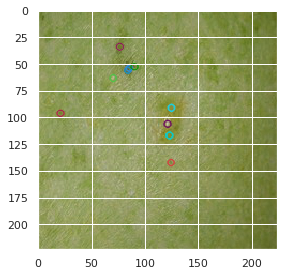

In [ ]:
imshow(features[0])

In [ ]:
# Save test Features
np.savez_compressed('/content/drive/MyDrive/SIFT/Test_HUE_SIFT_v2',
                    features=features, labels=labels)

In [ ]:
import glob
import cv2 as cv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.io import imread, imshow

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D , Input
from keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam,SGD
from keras.models import Sequential
from keras.layers import BatchNormalization, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.utils import class_weight
from sklearn import metrics
from keras import regularizers
from keras.callbacks import ModelCheckpoint

In [ ]:
data = np.load('/content/drive/MyDrive/SIFT/Train_HUE_SIFT_v2.npz')
test_data = np.load('/content/drive/MyDrive/SIFT/Test_HUE_SIFT_v2.npz')

In [ ]:
X_test = test_data['features']
Y_test = test_data['labels']

In [ ]:
data.files

['features', 'labels']

In [ ]:

features = data['features']
labels = data['labels']

In [ ]:
img = np.reshape(features[4],(224,224,3))

(-0.5, 223.5, 223.5, -0.5)

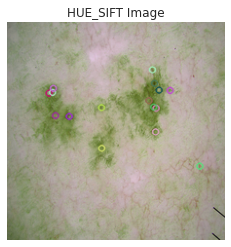

In [ ]:
plt.imshow(img)
plt.title('HUE_SIFT Image')
plt.axis('off')

In [ ]:
def build_cnn():
    
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=(224,224,3) , activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(BatchNormalization(axis = -1))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))
    
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(BatchNormalization(axis = -1))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))
    
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(BatchNormalization(axis = -1))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))
    
    model.add(Conv2D(512, (3, 3), activation='relu'))
    model.add(BatchNormalization(axis = -1))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))

    model.add(Flatten())
    model.add(Dense(256 ,  activation='relu'))
    model.add(BatchNormalization(axis = -1))
    model.add(Dropout(0.2))
    model.add(Dense(2 , activation ='sigmoid'))

    return model

In [ ]:

model = build_cnn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_50 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 109, 109, 64)      18496     
_________________________________________________________________
batch_normalization_54 (Batc (None, 109, 109, 64)      256       
_________________________________________________________________
max_pooling2d_51 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_62 (Dropout)         (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 52, 52, 128)     

In [ ]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5, random_state=None)

cvscores = []
acc = []
vacc = []
loss = []
vloss = []
i = 0
for train_index, val_index in skf.split(features,labels):
    i = i + 1
    X_train, X_val = features[train_index], features[val_index]
    Y_train, Y_val = labels[train_index], labels[val_index]
    name = 'model_HUE_SIFT_v' + str(i) + '.hdf5'
    mcp = ModelCheckpoint(filepath=name, monitor="val_accuracy", save_best_only=True, save_weights_only=False)
    
    print('\n')
    print('Start Training Fold_' + str(i)+'--------------------------------------')
    #print('\n')
    hist = model.fit(X_train,Y_train, validation_data = (X_val,Y_val) ,epochs = 30,verbose=1,callbacks=[mcp])
    print('\n')
    scores = model.evaluate(X_val,Y_val, verbose=1)
    print('\n-------------Model Evaluation Results '+ 'Fold_' + str(i) + '-----------')
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    print('\n------------------------------------------------------------------------------------------------------------')
    cvscores.append(scores[1] * 100)
    acc.append(hist.history['accuracy'])
    vacc.append(hist.history['val_accuracy'])
    loss.append(hist.history['loss'])
    vloss.append(hist.history['val_loss'])

print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))



Start Training Fold_1--------------------------------------
Epoch 1/30
53/53 [==============================] - 9s 140ms/step - loss: 0.7316 - accuracy: 0.7528 - val_loss: 1.1890 - val_accuracy: 0.5036
Epoch 2/30
53/53 [==============================] - 7s 134ms/step - loss: 0.4318 - accuracy: 0.8143 - val_loss: 1.4838 - val_accuracy: 0.5418
Epoch 3/30
53/53 [==============================] - 7s 134ms/step - loss: 0.3877 - accuracy: 0.8245 - val_loss: 1.0507 - val_accuracy: 0.6396
Epoch 4/30
53/53 [==============================] - 7s 134ms/step - loss: 0.4071 - accuracy: 0.8131 - val_loss: 1.8475 - val_accuracy: 0.5370
Epoch 5/30
53/53 [==============================] - 7s 134ms/step - loss: 0.3470 - accuracy: 0.8460 - val_loss: 0.8701 - val_accuracy: 0.6563
Epoch 6/30
53/53 [==============================] - 7s 134ms/step - loss: 0.3356 - accuracy: 0.8501 - val_loss: 0.4022 - val_accuracy: 0.8329
Epoch 7/30
53/53 [==============================] - 7s 133ms/step - loss: 0.3185 - acc

In [ ]:

X_test.shape

(450, 224, 224, 3)

In [ ]:
# Cross-Validation Predictions
test_results = model.evaluate(X_test,Y_test)

y_test_pred=model.predict(X_test) 
classes_x=np.argmax(y_test_pred,axis=1)

print('\nCV_Results_Overall Model Performance')
print(test_results)

15/15 [==============================] - 1s 36ms/step - loss: 0.8647 - accuracy: 0.8178

CV_Results_Overall Model Performance
[0.8646695017814636, 0.8177777528762817]


In [ ]:
fold_results = []

In [ ]:
model.load_weights('model_HUE_SIFT_v1.hdf5')
fold1_results = model.evaluate(X_test,Y_test)

print('\n---CV_Results_Fold_1---')
print(fold1_results)
fold_results.append(fold1_results)

15/15 [==============================] - 1s 42ms/step - loss: 0.4171 - accuracy: 0.8067

---CV_Results_Fold_1---
[0.4171110689640045, 0.8066666722297668]


In [ ]:
model.load_weights('model_HUE_SIFT_v2.hdf5')
fold2_results = model.evaluate(X_test,Y_test)

print('\n---CV_Results_Fold_2---')
print(fold2_results)
fold_results.append(fold2_results)

15/15 [==============================] - 1s 43ms/step - loss: 0.5711 - accuracy: 0.7911

---CV_Results_Fold_2---
[0.5711439251899719, 0.7911111116409302]


In [ ]:
model.load_weights('model_HUE_SIFT_v3.hdf5')
fold3_results = model.evaluate(X_test,Y_test)

print('\n---CV_Results_Fold_3---')
print(fold3_results)
fold_results.append(fold3_results)

15/15 [==============================] - 1s 40ms/step - loss: 0.6926 - accuracy: 0.7889

---CV_Results_Fold_3---
[0.6925580501556396, 0.7888888716697693]


In [ ]:
model.load_weights('model_HUE_SIFT_v4.hdf5')
fold4_results = model.evaluate(X_test,Y_test)

print('\n---CV_Results_Fold_4---')
print(fold4_results)
fold_results.append(fold4_results)

15/15 [==============================] - 1s 45ms/step - loss: 0.7561 - accuracy: 0.8044

---CV_Results_Fold_4---
[0.7560911178588867, 0.804444432258606]


In [ ]:
model.load_weights('model_HUE_SIFT_v5.hdf5')
fold5_results = model.evaluate(X_test,Y_test)

print('\n---CV_Results_Fold_5---')
print(fold5_results)
fold_results.append(fold5_results)

15/15 [==============================] - 1s 36ms/step - loss: 0.6967 - accuracy: 0.8111

---CV_Results_Fold_5---
[0.6967129111289978, 0.8111110925674438]


In [ ]:
fold_results = np.array(fold_results)

In [ ]:
overall_loss = fold_results[:,0]
overall_accu = fold_results[:,1]

In [ ]:
print("\n\nTest Data Accuracy : %.2f%% (+/- %.2f%%)" % (np.mean(overall_accu)*100, np.std(overall_accu)*100))



Test Data Accuracy : 80.04% (+/- 0.88%)


In [ ]:
model.load_weights('model_HUE_SIFT_v5.hdf5')
y_pred = model.predict(X_test)
y_pred=np.argmax(y_pred,axis=1)

print('Best CV Fold Accuracy %.2f%%' % (metrics.accuracy_score(Y_test, y_pred)*100))
print('Model Accuracy %.2f%%' % (metrics.accuracy_score(Y_test, classes_x)*100))

Best CV Fold Accuracy 81.11%
Model Accuracy 81.78%


In [ ]:
acc_1 = np.hstack((acc[0],acc[1],acc[2],acc[3],acc[4]))
vacc_1 = np.hstack((vacc[0],vacc[1],vacc[2],vacc[3],vacc[4]))
loss_1 = np.hstack((loss[0],loss[1],loss[2],loss[3],loss[4]))
vloss_1 = np.hstack((vloss[0],vloss[1],vloss[2],vloss[3],vloss[4]))

In [ ]:
def plot_model_history(acc,vacc,loss,vloss):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    axs[0].plot(range(1,len(acc)+1),acc)
    axs[0].plot(range(1,len(vacc)+1),vacc)
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(acc)+1),len(acc)/10)
    axs[0].legend(['train', 'val'], loc='best')
    axs[1].plot(range(1,len(loss)+1),loss)
    axs[1].plot(range(1,len(vloss)+1),vloss)
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(loss)+1),len(loss)/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  from ipykernel import kernelapp as app


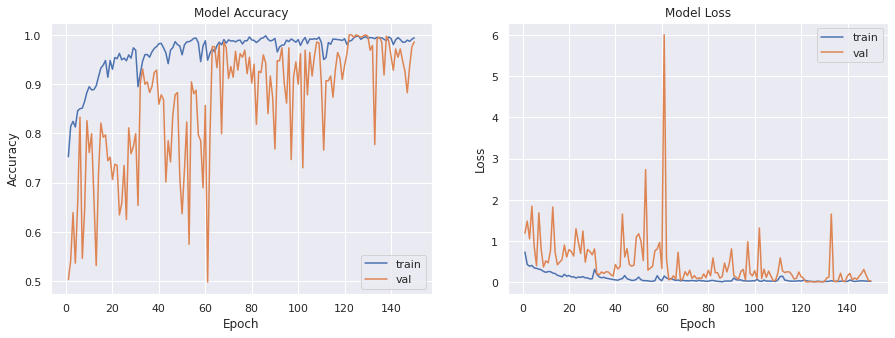

In [ ]:
plot_model_history(acc_1,vacc_1,loss_1,vloss_1)

In [ ]:
def plot_confusion_matrix(cm,target_names,title='Confusion matrix',cmap=None,normalize=True):
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(6, 4))
    plt.grid(b=False)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title,fontsize=12,weight='bold')
    #plt.legend('off')
    #plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=0,fontsize=12,weight='bold')
        plt.yticks(tick_marks, target_names,fontsize=12,weight='bold')
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black",fontsize=12,weight='bold')
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black",fontsize=12,weight='bold')
    plt.tight_layout()
    plt.ylabel('True label',fontsize=12,weight='bold')
    plt.xlabel('\n Predicted label \n Test accuracy={:0.2f}%; Misclass={:0.2f}%'.format(accuracy*100, misclass*100),fontsize=12,weight='bold')
    #plt.get_legend().remove()
    
    plt.show()

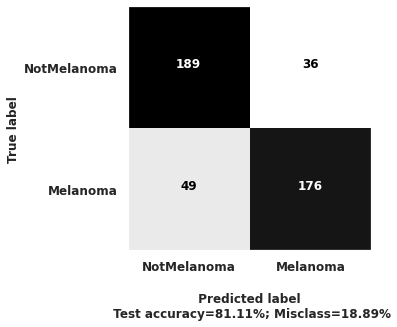

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,y_pred)
plot_confusion_matrix(cm = cm,normalize= False,cmap ='binary',target_names = ['NotMelanoma', 'Melanoma'],
                      title= '')

In [ ]:
from sklearn.metrics import classification_report

# Generate a classification report
report = classification_report(Y_test, y_pred, target_names=['NotMelanoma','Melanoma'])

print(report)

              precision    recall  f1-score   support

 NotMelanoma       0.79      0.84      0.82       225
    Melanoma       0.83      0.78      0.81       225

    accuracy                           0.81       450
   macro avg       0.81      0.81      0.81       450
weighted avg       0.81      0.81      0.81       450

